9 June 2015, P.M.

#Reduction of accelerometer dimensionality


Using the strategy from **03** I try to reduce the dimensionality of the data here. This is to explore how the amount of data necessary to be transmitted can be reduced to save power on the on-person-device.

```
fall = 4
lie down = 3
sit down = 2
stand = 1
walk = 0
```

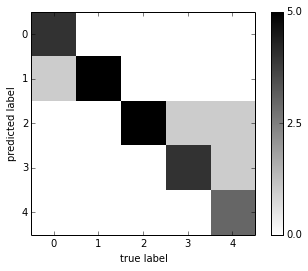

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time
import mlpy as ml

###Load data
X = np.load('X.npy')[0:50:2,:,:]
y = np.load('A.npy')[0:50:2]

X_test = np.load('X.npy')[1:50:2,:,:]
y_test = np.load('A.npy')[1:50:2]

###Taking the root mean square value of x, y, and z
X_av = ((X[:,0,:]**2+X[:,1,:]**2+X[:,2,:]**2)/3)**0.5
X_test_av = ((X_test[:,0,:]**2+X_test[:,1,:]**2+X_test[:,2,:]**2)/3)**0.5

###Calculate distance matrix against test sample
dist_X_av = np.zeros((X_test_av.shape[0], X_av.shape[0]),dtype=float)

# k = test sample
# i = row of training data
# j = feature or dimension (x,y,z) --> reduced to one!

for k in range(X_test_av.shape[0]):
    for i in range(X_av.shape[0]):
        dist_X_av[k,i] = ml.dtw_std(X_av[i,:],X_test_av[k,:])


y_pred = np.zeros(X_test_av.shape[0], dtype=float)

model = ml.KNN(1)

for k in range(X_test_av.shape[0]): 
    model.learn(dist_X_av[k,:].reshape((dist_X_av[k,:].shape[0],1)),y)
    y_pred[k] = model.pred([0.])

###Assess prediction accuracy
from sklearn import metrics
import matplotlib.cm as cm

plt.imshow(metrics.confusion_matrix(y_pred, y_test), interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar(ticks=[0,2.5,5])
plt.xlabel("true label")
plt.ylabel("predicted label");

**Conclusion:** The rms value of x, y, and z is less accurate in classifying, but should be sufficient with a larger training data set.